# Descripción del proyecto

En este proyecto, estamos colaborando con Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Como analistas, nuestra tarea principal es identificar patrones en los datos disponibles para comprender mejor las preferencias de los pasajeros y los factores externos que puedan influir en sus decisiones de viaje.

Uno de los objetivos clave es analizar cómo las condiciones externas, como el clima, afectan la frecuencia de los viajes. Además, se realizará un análisis de los competidores para obtener información valiosa que nos permita posicionar mejor a Zuber en el mercado. También se probará una hipótesis sobre el impacto de las condiciones climáticas en la duración y frecuencia de los viajes, lo que podría tener implicaciones importantes para la estrategia operativa de la empresa.

## Inicialización

In [1]:
# Importar librerías 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_cabs = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoff_location = pd.read_csv('/datasets/project_sql_result_04.csv')
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

## Información de los Datos

### DataFrame de Compañías de Taxis

In [3]:
# Obtener las primeras filas de la tabla df_cabs
df_cabs.head()

company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

In [4]:
# Obtener la información general sobre nuestros datos
df_cabs.describe()

trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

In [5]:
# Obtener más información
df_cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Verificar si hay duplicados
df_cabs.duplicated().sum()

0

**Descripción del Dataset** `df_cabs`

Este dataset está compuesto por 64 filas y 2 columnas:

- `company_name`: Nombre de la empresa de taxis.
- `trips_amount`: Número de viajes que de cada compañía de taxis el 15 y 16 de noviembre de 2017.<br><br>

→ No hay valores nulos en las columnas, ya que todas las filas contienen datos en ambas columnas.<br>
→ No se encontraron filas duplicadas en el dataset.<br>
→ La columna trips_amount muestra que hay compañías con un número de viajes que varía considerablemente. El número mínimo de viajes es 2, mientras que el máximo es 19,558.<br>
→ La media de los viajes por compañía es 2,145 viajes, con una desviación estándar bastante alta (3,812), lo que sugiere una gran dispersión en los datos.<br>
→ La mitad de las compañías reportan menos de 179 viajes, mientras que el 75% de las compañías tiene menos de 2,106 viajes, lo que indica una distribución sesgada con algunas compañías reportando muchos más viajes que otras.<br><br>

***Conclusiones:***
El dataset no presenta errores evidentes en cuanto a duplicados o valores nulos, y provee información útil para entender la cantidad de viajes realizados por cada compañía de taxis. La gran variabilidad en el número de viajes sugiere que algunas compañías son significativamente más activas que otras, lo cual puede ser relevante para el análisis posterior.

### DataFrame de Barrios de Chicago

In [7]:
# Obtener las primeras filas de la tabla df_dropoff_location
# Identifico los 10 principales barrios en términos de finalización
df_dropoff_location.head(10)

dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667

In [8]:
# Obtener la información general sobre nuestros datos
df_dropoff_location.describe()

average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

In [9]:
# Obtener más información
df_dropoff_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# Verificar si hay duplicados
df_dropoff_location.duplicated().sum()

0

**Descripción del Dataset** `df_dropoff_location`

Este dataset está compuesto por 94 filas y 2 columnas:

- `dropoff_location_name`: Barrios de Chicago donde finalizaron los viajes.
- `average_trips`: El promedio de viajes que terminaron en cada barrio en noviembre de 2017.

→ No hay valores nulos en las columnas, ya que todas las filas contienen datos en ambas columnas.<br> 
→ No se encontraron filas duplicadas en el dataset.<br> 
→ La columna dropoff_location_name muestra que las ubicaciones de destino tienen un promedio de viajes que varía considerablemente. El número mínimo de viajes es 1.8, mientras que el máximo es 10,727.47.<br> 
→ La media de los viajes es de aproximadamente 600 viajes, con una desviación estándar alta (1,715), lo que sugiere una gran dispersión en los datos.<br> 
→ La mitad de las ubicaciones reportan menos de 52 viajes, mientras que el 75% tiene menos de 299 viajes, indicando que algunas ubicaciones son mucho más populares que otras.<br><br>

**Conclusiones:** 
El dataset no presenta errores evidentes en cuanto a duplicados o valores nulos, y proporciona información valiosa sobre la frecuencia de los viajes hacia diferentes ubicaciones de destino. La alta variabilidad en el número de viajes indica que algunas ubicaciones son significativamente más frecuentadas que otras, lo que puede ser relevante para la planificación y optimización de rutas en el servicio de viajes compartidos.

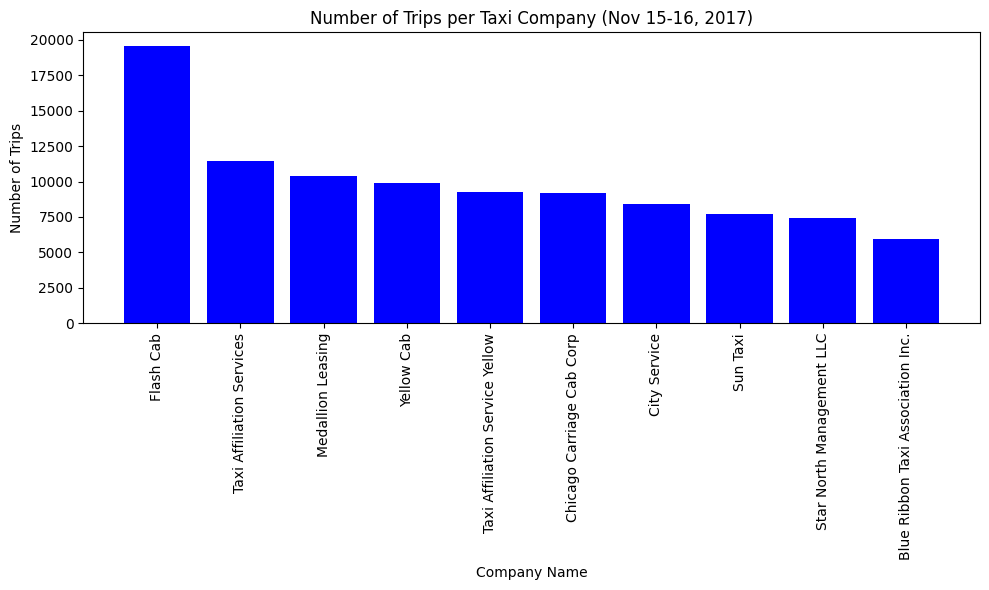

In [11]:
# Crear el gráfico de barras para las empresas de taxis
df_cabs_top = df_cabs.head(10)
plt.figure(figsize=(10, 6))
plt.bar(df_cabs_top['company_name'], df_cabs_top['trips_amount'], color='blue')

# Añadir etiquetas y título
plt.xlabel('Company Name')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Taxi Company (Nov 15-16, 2017)')
plt.xticks(rotation=90)  # Rotar los nombres de las compañías si son muchos o largos

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el gráfico para evitar solapamiento
plt.show()

*Flash Cab* es claramente la compañía con más viajes, con una cantidad significativamente mayor que las demás, superando los 17,500 viajes, domina el mercado durante estos dos días específicos, con una ventaja significativa sobre las demás compañías, en términos de cantidad de viajes.

*Taxi Affiliation Services, Medallion Leasing y Yellow Cab*, tienen un número similar de viajes, alrededor de 10,000 a 12,000, pero están bastante por debajo de *Flash Cab*.

Las compañías que siguen, como *City Service, Sun Taxi y Blue Ribbon Taxi Association Inc.*, tienen menos de 10,000 viajes, con una diferencia más marcada a medida que avanzamos en la lista.

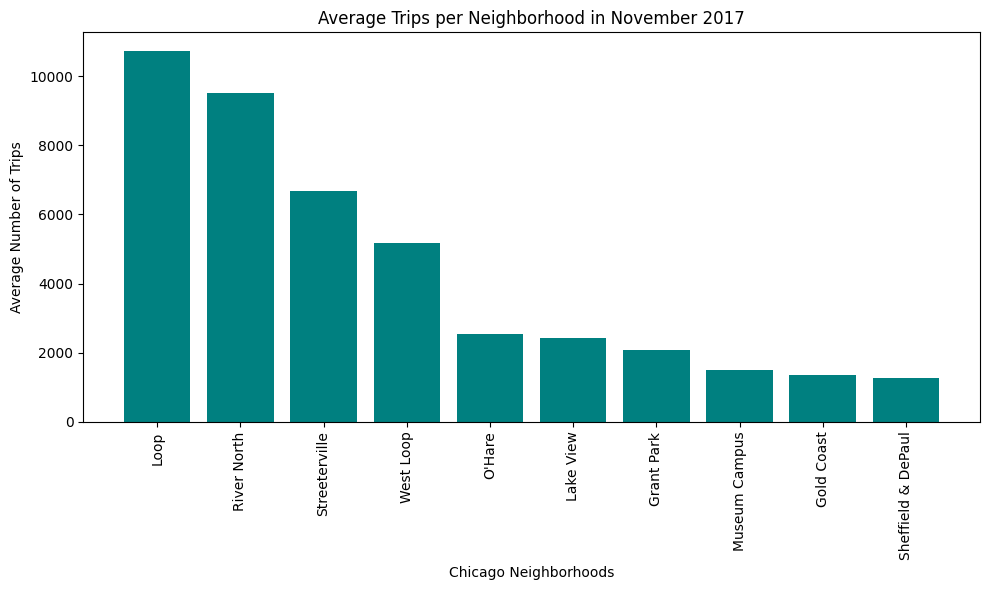

In [12]:
# Crear el gráfico de barras para los barrios de Chicago
df_dropoff_location_top = df_dropoff_location.head(10)
plt.figure(figsize=(10, 6))
plt.bar(df_dropoff_location_top['dropoff_location_name'], df_dropoff_location_top['average_trips'], color='teal')

# Añadir etiquetas y título
plt.xlabel('Chicago Neighborhoods')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Neighborhood in November 2017')
plt.xticks(rotation=90) 

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el gráfico para evitar solapamiento
plt.show()

*Loop* es el barrio que recibió el mayor número de viajes, con un promedio de más de 10,000 viajes, seguido de *River North* con un poco menos de 10,000.

Otros barrios como *Streeterville y West Loop* están en un rango intermedio, con alrededor de 5,000 a 7,000 viajes.

Barrios como *O'Hare, Lake View y Grant Park* tienen un número de viajes notablemente menor, con promedios inferiores a 3,000 viajes.

*Loop y River North*, son los destinos más populares para los viajes en taxi, lo que sugiere que estas áreas son puntos de alta actividad, posiblemente por sean áreas comerciales, turísticas o de negocios.

### DataFrame de Viajes y Condiciones Climáticas

project_sql_result_07.csv: Resultado de la última consulta. <br>
Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, el sábado.<br>

In [13]:
# Obtener las primeras filas de la tabla df_trips
df_trips.head()

start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

In [14]:
# Obtener la información general sobre nuestros datos
df_trips.describe()

duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000

In [15]:
# Obtener más información
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
# Verificar si hay duplicados
num_duplicates = df_trips.duplicated().sum()
num_duplicates

197

Descripción del Dataset df_trips

Este dataset está compuesto por 1068 filas y 3 columnas:

•	`start_ts`: fecha y hora de recogida <br>
•	`weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje<br>
•	`duration_seconds`: duración del viaje en segundos<br><br>

→ No hay valores nulos en las columnas, ya que todas las filas contienen datos en las tres columnas.<br> 
→ Se encontraron 197 filas duplicadas en el dataset.<br> 
→ La columna duration_seconds muestra que la duración de los viajes varía considerablemente, con un tiempo mínimo de 0 segundos y un máximo de 7,440 segundos.<br> 
→ La duración promedio de los viajes es de aproximadamente 2,072 segundos, con una desviación estándar de 769, lo que sugiere una dispersión moderada en los tiempos de viaje.<br> 
→ La mitad de los viajes tienen una duración inferior a 1,980 segundos, y el 75% de los viajes tienen menos de 2,580 segundos, indicando que la mayoría de los viajes tienden a durar menos de 43 minutos.<br><br>

**Conclusiones:** El dataset presenta algunos errores evidentes en forma de filas duplicadas, lo que podría afectar el análisis posterior por lo que hay que solucionarlo de manera adecuada. Además, proporciona información útil sobre la duración de los viajes y las condiciones climáticas, lo que puede ser relevante para entender cómo estos factores influyen en la experiencia del pasajero en el servicio de viajes compartidos.

In [17]:
# Convertir la columna start_ts a tipo datetime
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])

# Verificar si hay filas duplicadas en todas las columnas
duplicates = df_trips.duplicated()

print(df_trips[duplicates])

                start_ts weather_conditions  duration_seconds
62   2017-11-11 06:00:00               Good            1260.0
74   2017-11-11 08:00:00               Good            1380.0
76   2017-11-04 09:00:00               Good            1380.0
117  2017-11-11 07:00:00               Good            1380.0
119  2017-11-04 14:00:00               Good            3300.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


Se encontraron 197 duplicados exactos dentro de df_trips, lo que puede indicar un error en la consulta SQL cuando creé el DataFrame.<br><br>
La presencia de filas exactamente iguales en el DataFrame indica una redundancia en los datos que no aporta valor analítico y puede distorsionar los resultados de análisis posteriores. Por lo que se eliminan las filas duplicadas, así, se mejora la calidad de los datos, lo que permite obtener resultados más precisos y representativos. Con esto, también se optimiza el rendimiento del procesamiento de datos, ya que reduce la carga en la memoria y acelera las operaciones de análisis. 
Lo anterior, mantiene la integridad y eficiencia del análisis de datos.

In [18]:
# Eliminar filas duplicadas del DataFrame df_trips
df_trips = df_trips.drop_duplicates()

In [19]:
# Verificar si hay duplicados
df_trips.duplicated().sum()

0

In [20]:
df_trips

start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good            2410.0
1    2017-11-25 14:00:00               Good            1920.0
2    2017-11-25 12:00:00               Good            1543.0
3    2017-11-04 10:00:00               Good            2512.0
4    2017-11-11 07:00:00               Good            1440.0
...                  ...                ...               ...
1060 2017-11-04 14:00:00               Good            2700.0
1061 2017-11-18 16:00:00                Bad            2186.0
1063 2017-11-25 11:00:00               Good               0.0
1064 2017-11-11 10:00:00               Good            1318.0
1067 2017-11-04 16:00:00                Bad            2834.0

[871 rows x 3 columns]

**Ahora df_trips sin duplicados contiene 871 filas**

## Prueba de Hipótesis

**Hipótesis:** <br>
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [21]:
# Ver los valores únicos en la columna weather_conditions
print(df_trips['weather_conditions'].value_counts())

Good    723
Bad     148
Name: weather_conditions, dtype: int64


In [22]:
# Separar días lluviosos (Bad) y no lluviosos (Good)
rainy_days = df_trips[df_trips['weather_conditions'] == 'Bad']
non_rainy_days = df_trips[df_trips['weather_conditions'] == 'Good']

# Calcular la duración promedio de los viajes en días lluviosos y no lluviosos
mean_duration_rainy = rainy_days['duration_seconds'].mean()
mean_duration_non_rainy = non_rainy_days['duration_seconds'].mean()

# Mostrar los promedios
print(f'Duración promedio de los viajes en días lluviosos: {mean_duration_rainy} segundos')
print(f'Duración promedio de los viajes en días no lluviosos: {mean_duration_non_rainy} segundos')

# Nivel de significancia
alpha = 0.05

# Realizar la prueba de Levene para comprobar la igualdad de varianzas
levene_stat, levene_p_value = stats.levene(rainy_days['duration_seconds'], non_rainy_days['duration_seconds'])

# Mostrar el valor p de la prueba de Levene
print(f'Valor p de la prueba de Levene: {levene_p_value}')

# Determinar si se rechaza o no la hipótesis de igualdad de varianzas
if levene_p_value < alpha:
    equal_var = False
    print("Se rechaza la hipótesis nula de igualdad de varianzas.")
else:
    equal_var = True
    print("No se rechaza la hipótesis nula de igualdad de varianzas.")
    
# Realizar una prueba t para comparar las dos medias
t_stat, p_value = stats.ttest_ind(rainy_days['duration_seconds'], non_rainy_days['duration_seconds'])

# Mostrar el valor p
print(f'Valor p: {p_value}')

Duración promedio de los viajes en días lluviosos: 2409.2297297297296 segundos
Duración promedio de los viajes en días no lluviosos: 2032.253112033195 segundos
Valor p de la prueba de Levene: 0.9806770360671218
No se rechaza la hipótesis nula de igualdad de varianzas.
Valor p: 7.397770692813658e-08


**Valor p de la prueba de Levene:**

Valor p es 0.9807. <br>
Como el valor es mayor que el nivel de significancia, no se rechaza la hipótesis nula de igualdad de varianzas. <br>
Es decir que no hay evidencia suficiente para afirmar que las varianzas de las duraciones de los viajes en días lluviosos y no lluviosos son significativamente diferentes.

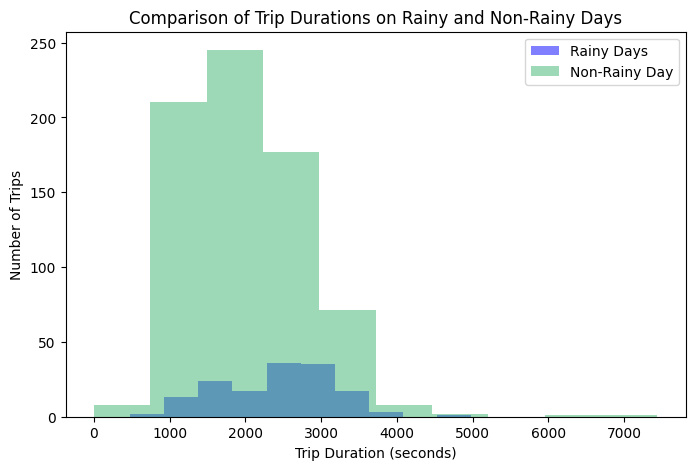

In [23]:
# Visualización para comparar
plt.figure(figsize=(8, 5))
plt.hist(rainy_days['duration_seconds'], alpha=0.5, label='Rainy Days', color='blue')
plt.hist(non_rainy_days['duration_seconds'], alpha=0.5, label='Non-Rainy Day', color='mediumseagreen')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.legend(loc='upper right')
plt.title('Comparison of Trip Durations on Rainy and Non-Rainy Days')
plt.show()

**Hipótesis nula (H₀):** La duración promedio de los viajes no cambia entre los sábados lluviosos y no lluviosos. Esto significa que la media de la duración de los viajes es igual para ambos grupos.<br>
**Hipótesis alternativa (H₁):** La duración promedio de los viajes cambia entre los sábados lluviosos y no lluviosos. Esto significa que las medias de duración son diferentes entre ambos grupos.

In [24]:
# Verificar si rechazamos o no la hipótesis nula
if p_value < alpha:
    display(HTML("<h1><b>Rechazamos la hipótesis nula: La duración promedio de los viajes cambia los sábados lluviosos.</b></h1>"))
else:
    display(HTML("<h1><b>No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la duración promedio de los viajes cambia los sábados lluviosos.</b></h1>"))

**El nivel de significancia es** `α = 0.05` *y lo usé porque es el valor comúnmente utilizado en pruebas estadísticas.*

**La hipótesis nula (H₀)** *En estadística, la hipótesis nula suele representar el estado de no cambio o no efecto. Esto significa que, por defecto, asumimos que no hay diferencia en las medias de duración de los viajes entre sábados lluviosos y no lluviosos, esta es la razón por la que escogí la hipótesis nula.*

**La hipótesis alternativa (H₁)** *Plantea lo contrario, así, si los datos proporcionan evidencia suficiente, se rechaza la hipótesis nula a favor de la hipótesis alternativa.*

# Conclusión
    
    El análisis confirma que los viajes en sábados lluviosos duran más que en días no lluviosos, probablemente debido a condiciones adversas como tráfico o velocidad reducida. Esto puede ser útil para ajustar la planificación de recursos o precios en el servicio de taxis.

## Conclusión General del Proyecto

*Carga e Importación de Datos*: Se importaron los datasets relevantes para el análisis: `df_cabs`, `df_dropoff_location`, y `df_trips`. Estos conjuntos de datos proporcionan información sobre las compañías de taxis, las ubicaciones de entrega, y los viajes, respectivamente.

***Análisis de Duplicados y Nulos:***

En `df_cabs`, se verificó que no había valores nulos ni filas duplicadas. Esto garantizó la integridad de los datos, permitiendo un análisis confiable de la cantidad de viajes realizados por cada compañía.

En `df_dropoff_location`, también se confirmaron la ausencia de duplicados y valores nulos, facilitando un entendimiento claro sobre las frecuencias de viajes hacia diferentes destinos.

En `df_trips`, se identificaron y eliminaron filas duplicadas, lo que fue justificado por la existencia de entradas idénticas que podrían distorsionar el análisis. Esto se realizó para asegurar que cada registro refleje una única observación de viaje.

***Análisis Descriptivo:***

Se llevaron a cabo análisis descriptivos para cada dataset, generando estadísticas como media, mediana y desviación estándar. Esto permitió identificar patrones en los datos, como la variabilidad en el número de viajes y las duraciones de los mismos.
Se observó que *Flash Cab* lidera el mercado, mientras que *Loop* y *River North* son los barrios más solicitados para viajes, lo que refleja áreas de alta actividad.

***Análisis de Duración de Viajes:***

Se separaron los viajes en días lluviosos y no lluviosos para analizar la duración promedio, encontrando que los viajes en días lluviosos son más largos, lo cual fue respaldado por pruebas estadísticas (incluyendo la prueba de Levene para varianzas).
Esto sugiere que condiciones climáticas adversas impactan la duración de los viajes, información relevante para ajustar la planificación de recursos y precios en el servicio de taxis.

***Conclusiones Generales:***

1. Los datos son útiles para comprender el funcionamiento y la operatividad de Zuber en Chicago.

2. La identificación de patrones en los datos proporciona una base sólida para futuras decisiones en términos de optimización de rutas, ajustes en la planificación de recursos y estrategias de marketing.

3. Las diferencias en duración de viajes según condiciones climáticas destacan la importancia de considerar factores externos en la operativa diaria de la empresa.

El análisis de los datasets `df_cabs`, `df_dropoff_location` y `df_trips` ha proporcionado información valiosa sobre el funcionamiento del servicio de viajes compartidos en Chicago, destacando patrones en la actividad de las compañías de taxis, las preferencias de los pasajeros en cuanto a ubicaciones de destino y la influencia de las condiciones climáticas en la duración de los viajes.

`df_cabs`:

Este dataset revela que Flash Cab domina el mercado de taxis con más de 17,500 viajes, superando significativamente a otras compañías como Taxi Affiliation Services, Medallion Leasing y Yellow Cab, que tienen entre 10,000 y 12,000 viajes. Las empresas que siguen tienen menos de 10,000 viajes, indicando una marcada disparidad en la actividad del mercado. Esta información es crucial para entender la competitividad del sector y la distribución de la clientela.

`df_dropoff_location`:

Los datos indican que el Loop es el barrio más frecuentado, con un promedio de más de 10,000 viajes, seguido por River North. Las ubicaciones menos visitadas, como O'Hare y Lake View, presentan un número considerablemente menor de viajes. Estos hallazgos pueden guiar la planificación y optimización de rutas, sugiriendo que se debería concentrar más recursos en las áreas de mayor actividad.

`df_trips`:

El análisis de la duración de los viajes revela que los viajes en días lluviosos son significativamente más largos en comparación con los días no lluviosos, lo que se atribuye a factores como el aumento del tráfico y la reducción de la velocidad. La prueba de Levene indica que no hay diferencias significativas en las varianzas de duración de los viajes entre ambos tipos de días, pero la duración promedio de los viajes en días lluviosos se confirma como mayor, lo que puede ser relevante para ajustar estrategias de precios y recursos operativos en días con clima adverso.
<br><br>

***En conjunto, estos datasets ofrecen una visión integral sobre cómo se comporta el servicio de taxis en Chicago, destacando áreas de alta demanda, la variabilidad en la actividad de las compañías y la influencia de las condiciones climáticas en la experiencia del pasajero. Esta información es esencial para la toma de decisiones estratégicas en la planificación y mejora del servicio de viajes compartidos.***